# Sales Performance Analysis

**Aim & Objective:** The aim of this analysis is to conduct an in-depth study of our sales performance in order to formulate a comprehensive growth strategy. 

1. Exploratory Data Analysis
2. Apartment Rent Distribution Per City
3. Best Performing Lead Source
4. Employee Performance Analysis
5. Conclusion

## Package Requirements

In [318]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import itertools
import numpy as np

## Exploratory Data Analysis

**Aim:** The of this section is clean & understand the different fields/variables in the dataset.

In [6]:
#Reading in the data

df = pd.read_excel('wunderflats.xlsx')

In [7]:
df.head()

,ID,Owner,RE Lead Type,RE Lead Source,Pipeline,Status,Done Activities,Deal created,Landlord,Landlord Type,RE Cities,Monthly Rent
0,328496,Lucas Fichtel,e-mail,IS24,RE new acquisitions,won,4,2015-07-26 20:21:12,Oliver Görner,limited >=12 months,Berlin,1865.333333
1,63146,Jonas Schmidt,e-mail,ebay classifieds,RE new acquisition,won,0,2016-09-27 15:10:18,Herr Andreas Crüsemann,limited >=12 months,Berlin,1234.000000
2,63329,Jonas Schmidt,e-mail,ebay classifieds,RE new acquisition,won,0,2016-09-27 15:11:06,Herr Marco Thiele,limited >=12 months,Berlin,1341.000000
3,63512,Jonas Schmidt,e-mail,ebay classifieds,RE new acquisition,won,0,2016-10-06 10:35:43,Ferdinand Heisig,limited >=12 months,Berlin,1586.000000
4,63695,Jonas Schmidt,e-mail,ebay classifieds,RE new acquisition,won,0,2016-10-06 10:36:44,Ursula Schröder,limited >=12 months,Berlin,1796.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 12 columns):
ID                 1806 non-null int64
Owner              1806 non-null object
RE Lead Type       1806 non-null object
RE Lead Source     1806 non-null object
Pipeline           1806 non-null object
Status             1806 non-null object
Done Activities    1806 non-null int64
Deal created       1806 non-null datetime64[ns]
Landlord           1806 non-null object
Landlord Type      1806 non-null object
RE Cities          1806 non-null object
Monthly Rent       1806 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 169.4+ KB


**Inferences**

- The data has 1806 rows and 12 columns.
- The data has no missing values. 
- The variables are as follows:
    
    - **ID**: An identifier for each sales lead.
    - **Owner**: The employee responsible for the sales lead.
    - **RE Lead Type**: The type of lead, a quick look tells us that this information is the form of communication used to  stay in touch with that lead. Ex: Email, Call. 
    - **RE Lead Source**: The source of origination of a lead. The medium from which the sales lead was generated. Ex: Classifieds, Internet Websites.
    - **Pipeline**: A sales pipeline. Consiststs of many parts that make up the whole such as acquistion to registration that eventually has the end goal of making a sale. 
    - **Status**: A quick look indicates that this feature provides information if the lead was won or not.
    - **Done Activities**: The number of activities executed by the owner in the process of winning the lead. 
    - **Landlord**: The name of the person who owns the property that will be rented out to prospective leads.
    - **Landlord Type**: The type of landlord categorized by how long they are willing to let out the property for rent. 
    - **RE Cities**: The cities in which the property is located at. 
    - **Monthly Rent**: The rent per/month for the property. 

### List of Owners

In [14]:
df['owner'] = df['Owner '].astype('category')

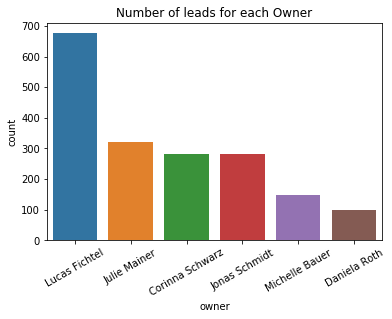

In [26]:
#Bar plot of the lead owners

ax = sns.countplot(df['owner'], order = df['owner'].value_counts().index)
plt.title('Number of leads for each Owner')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

In [9]:
#Identifying the counts of each lead owner

df['Owner '].value_counts()

Lucas Fichtel      676
Julie Mainer       320
Corinna Schwarz    282
Jonas Schmidt      281
Michelle Bauer     147
Daniela Roth       100
Name: Owner , dtype: int64

**Inferences**

A quick look at the counts of sales tells us that:
    
- Lucas had 676 Sales Leads.
- Julie had 320 Sales Leads.
- Corinna had 282 Sales Leads.
- Jonas had 281 Sales Leads.
- Michelle had 147 Sales Leads.
- Daniela had 100 Sales Leads.

**Action Plan**

- The story thus far seems to tell us that Lucas is the best performing employee while Daniela is the worst performing employee.
- However, this may not be the case as more leads does not mean sales that have been won. 
- We therefore need to analyze the number of leads that were converted to 'won' sales.
- We can also analyze the number of activities done by the owner to win each sale to further compare how efficient the employee is. 

### Type of Leads

In [27]:
df['lead_type'] = df['RE Lead Type'].astype('category')

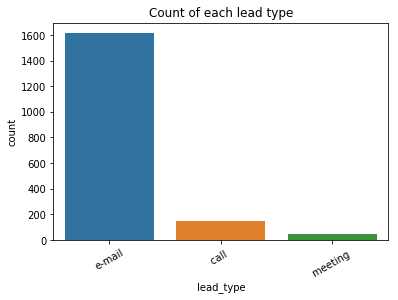

In [28]:
#Bar plot of the lead type

ax = sns.countplot(df['lead_type'], order = df['lead_type'].value_counts().index)
plt.title('Count of each lead type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

In [10]:
#Identifying the counts of each lead type

df['RE Lead Type'].value_counts()

e-mail      1616
call         145
meeting       45
Name: RE Lead Type, dtype: int64

**Inferences**

A quick look at the counts of the lead type tells us that:

- Email is the most common lead type with 1616 leads.
- Calls are the second most common lead type with 145 leads.
- Meeting's are the third most common lead type with 45 leads. 

**Action Plan**

- The lead type can be critical in understanding if a particular lead type has a higher chance of winning sales or not. For instance, out of the 145 calls, a large number of them may have converted to sales as conversations with human beings are much better at persuation compared to email. 
- This hypothesis will be explored further when assessing employee performance. 

### Lead Source

In [29]:
df['lead_source'] = df['RE Lead Source'].astype('category')

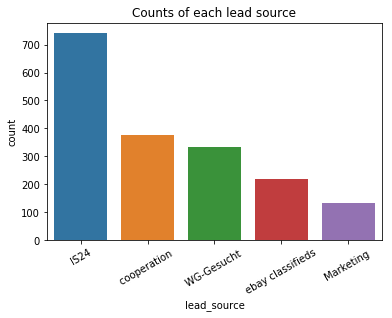

In [30]:
#Bar plot of the lead source count

ax = sns.countplot(df['lead_source'], order = df['lead_source'].value_counts().index)
plt.title('Counts of each lead source')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

In [31]:
#Identifying the counts of each lead type

df['lead_source'].value_counts()

IS24                740
cooperation         377
WG-Gesucht          335
ebay classifieds    221
Marketing           133
Name: lead_source, dtype: int64

**Inferences**

A quick look at the counts of the lead source tells us that:

- Popular German Real Estate Website Immobilien Scout has produced the most leads while marketing has produced the least leads. 
- However, more leads does not mean more sales that are won and this has to be explored further. 

**Action Plan**

- Deep dive into the performance of lead sources will be analyzed in the next section. 

### Pipeline

In [32]:
df['pipeline'] = df['Pipeline'].astype('category')

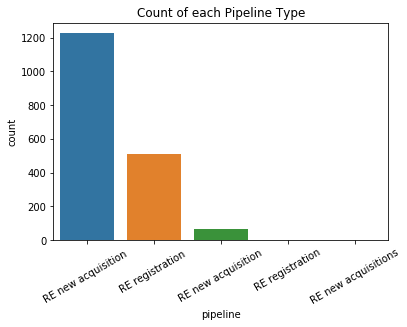

In [33]:
#Bar plot of the pipeline counts

ax = sns.countplot(df['pipeline'], order = df['pipeline'].value_counts().index)
plt.title('Count of each Pipeline Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

In [39]:
#Identifying the counts of each lead type

df['Pipeline'].value_counts()

RE new acquisition     1226
RE registration         508
RE new acquisition       69
RE registration           2
RE new acquisitions       1
Name: Pipeline, dtype: int64

In [43]:
#Printing out the category names

df['pipeline'].cat.categories

Index(['RE new acquisition', 'RE new acquisition ', 'RE new acquisitions',
       'RE registration', 'RE registration '],
      dtype='object')

In [44]:
#Cleaning the categories so that we only have two - New Acquisition & Registration

new_category = {"new_acquisition": ['RE new acquisition', 'RE new acquisition ', 'RE new acquisitions'], 
                "registration": ['RE registration', 'RE registration ']}

In [54]:
new_cat = {v: k for k,vv in new_category.items() for v in vv}

In [55]:
new_cat

{'RE new acquisition': 'new_acquisition',
 'RE new acquisition ': 'new_acquisition',
 'RE new acquisitions': 'new_acquisition',
 'RE registration': 'registration',
 'RE registration ': 'registration'}

In [56]:
#Maping the result

df['pipelines'] = df['pipeline'].map(new_cat)

In [57]:
#Final Pipeline Counts

df['pipelines'].value_counts()

new_acquisition    1296
registration        510
Name: pipelines, dtype: int64

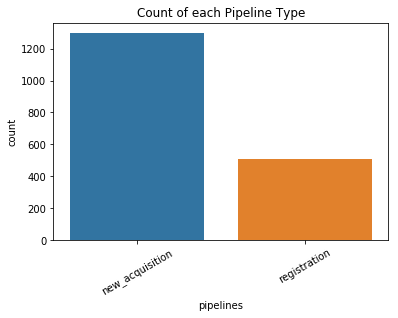

In [58]:
#Bar plot of the pipeline

ax = sns.countplot(df['pipelines'], order = df['pipelines'].value_counts().index)
plt.title('Count of each Pipeline Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

**Inferences**

- The variable 'Pipeline' was messy because it had repeating categories. 
- Therefore, I combined them into two unique categories which now gives the data more structure & logical sense.
- From the analysis we see that the pipeline has two steps - New Acquisition which is then followed by the registration. 

**Action Steps**

- Although it's obvious that the new acquisitions steps in the pipeline should be higher than the number of registrations for a typical sales pipeline we want to explore further & see how many lead sources were registration only 

### Status

In [59]:
df['status'] = df['Status '].astype('category')

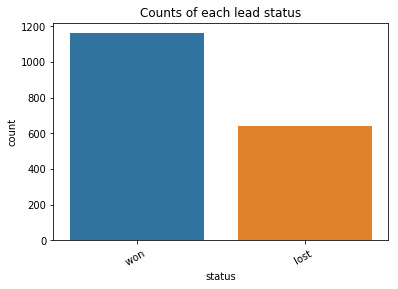

In [60]:
#Bar plot of the lead status

ax = sns.countplot(df['status'], order = df['status'].value_counts().index)
plt.title('Counts of each lead status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

In [61]:
#Identifying the counts of each lead status

df['status'].value_counts()

won      1162
lost      644
Name: status, dtype: int64

**Inferences**

- There are two statuses - 'Won' & 'Lost'
- A majority of the sales leads are won (1162).
- However, about 644 leads were lost. 

**Action Steps**

- In the future, we want to model the data to understand the factors that contribute to the winning a sales lead and the factors that contribute to losing a sales lead.
- This can be achieved with predictive modelling.

### Done Activities

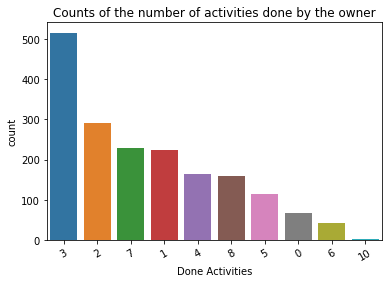

In [62]:
#Bar plot of the done activities

ax = sns.countplot(df['Done Activities'], order = df['Done Activities'].value_counts().index)
plt.title('Counts of the number of activities done by the owner')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

In [63]:
#Identifying the counts of each done activity

df['Done Activities'].value_counts()

3     516
2     292
7     228
1     223
4     163
8     159
5     114
0      67
6      43
10      1
Name: Done Activities, dtype: int64

**Inferences**

- Activities are the number steps taken by the lead owner/employee in order to secure the deal. 
- The graph shows us that 3 activites are the most performed while 10 activities are the least.

**Action Steps**

- We need to now understand the optimal number of activities that it takes to win a sales deal.
- Keeping in mind that the optimal number of activities depends on the lead source & the lead type, this number will vary. 

### Deal Created

In [64]:
#Earliest date

df['Deal created'].min()

Timestamp('2015-07-26 20:21:12')

In [65]:
#Latest Date

df['Deal created'].max()

Timestamp('2019-01-02 16:36:09')

**Inferences**

- The dates start at 2015-07-26 & end at 2019-01-02. 

**Action Plan**

- The dates form a key factor in understanding future employee performance based on past data

### Landlord

In [66]:
df['landlord'] = df['Landlord '].astype('category')

In [69]:
#Identifying the counts of each landlord

df['landlord'].value_counts()

Karsten Grünberg                        3
Albrecht von Weech                      2
Keiwan Kashi                            2
Jacqueline Baklan                       2
Herr D. Arzt                            2
Alessandro Cecere                       2
Oliver Görner                           2
Lutz Heinz                              2
Irina Rosenthal                         2
Dr. Philipp Ulbrich                     2
Gabriele Jones                          1
Gaia Filippone                          1
Gabriele Kukic                          1
Gabriele Faist                          1
Gabriele Bilz                           1
Gabriele Peter                          1
Gabriela Lenhardt                       1
Gabrielle Odinis                        1
sabrina.steeger@outlook.de              1
Gayane Ekimyan                          1
Friederike Vieth                        1
Georg Bereuter                          1
Georg Bruederl                          1
Georg Corodonnoff                 

**Inferences**

- We see that there are 1795 Unique Landlords.
- Very few landlords own multiple properties

### Landlord Type

In [71]:
df['landlord_type'] = df['Landlord Type'].astype('category')

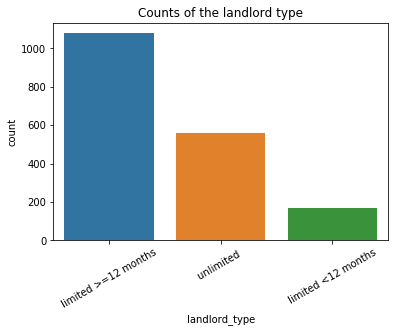

In [72]:
#Bar plot of the Landlord type

ax = sns.countplot(df['landlord_type'], order = df['landlord_type'].value_counts().index)
plt.title('Counts of the landlord type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

In [73]:
#Identifying the counts of each landlord type

df['landlord_type'].value_counts()

limited >=12 months    1079
unlimited               558
limited <12 months      169
Name: landlord_type, dtype: int64

**Inferences**

- We can observe that the the most common landlord type is the one who gives out properties for a limited duration that is greater than or equal to 12 months.
- The least common landlord type is the one who gives out properties for a limited duration that is lesser than 12 monhts.

**Action Steps**

- Landlords who give out properties for an unlimited duration will drive higher sales going forward, therefore leads that are won for such properties produce the most sales in the long run.
- This is important when analyzing employee & sales lead performance.

### Cities

In [74]:
df['cities'] = df['RE Cities'].astype('category')

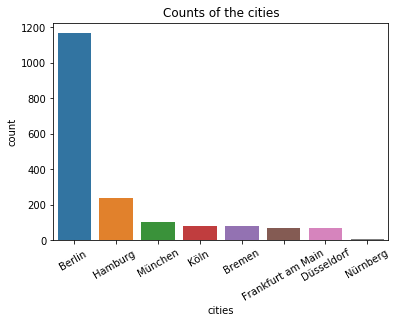

In [75]:
#Bar plot of the cities

ax = sns.countplot(df['cities'], order = df['cities'].value_counts().index)
plt.title('Counts of the cities')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

In [76]:
#Identifying the counts of each landlord type

df['cities'].value_counts()

Berlin               1167
Hamburg               239
München               100
Köln                   80
Bremen                 78
Frankfurt am Main      70
Düsseldorf             66
Nürnberg                6
Name: cities, dtype: int64

**Inferences**

- Berlin has the highest number of properties while Nürnberg has the lowest number of properties

**Action Steps**

- We can now proceed to understand the distribution of rents for each city based on this. 
- This is important because leads that are converted into sales in a city that has a higher rent distribution will result in more sales amounts.

**Monthly Rent**

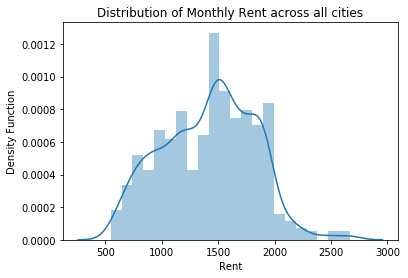

In [77]:
#Visualizaing the distributon of the monthly rent across all cities

sns.distplot(df['Monthly Rent'], kde=True)
plt.title('Distribution of Monthly Rent across all cities')
plt.xlabel('Rent')
plt.ylabel('Density Function')
plt.show()

In [78]:
df['Monthly Rent'].describe()

count    1806.000000
mean     1415.369208
std       406.435916
min       547.000000
25%      1122.833333
50%      1469.333333
75%      1716.833333
max      2669.000000
Name: Monthly Rent, dtype: float64

**Inferences**

- Across all cities the monthly rent is distributed between 547 to 2669 Euros.
- The mean of the rent distribution is 1415 Euros.
- The Median of the rent distribution is 1469 Euros.
- Since the Mean is almost equal to the Median we have a normal distribution. 

**Action Steps**

- We can now proceed to understand how the rent distribution varies across each city and compare this to statistics across all cities for reference.

## Apartment Rent Distribution By City

In [79]:
# Creating a dataframe for each city 

#Printing out the category names

df['cities'].cat.categories

Index(['Berlin ', 'Bremen', 'Düsseldorf', 'Frankfurt am Main', 'Hamburg ',
       'Köln ', 'München', 'Nürnberg'],
      dtype='object')

In [80]:
berlin = df[df['cities'] == 'Berlin ']
bremen = df[df['cities'] == 'Bremen']
dusseldorf = df[df['cities'] == 'Düsseldorf']
frankfurt = df[df['cities'] == 'Frankfurt am Main']
hamburg = df[df['cities'] == 'Hamburg ']
koln = df[df['cities'] == 'Köln ']
munich = df[df['cities'] == 'München']
nurnberg = df[df['cities'] == 'Nürnberg']

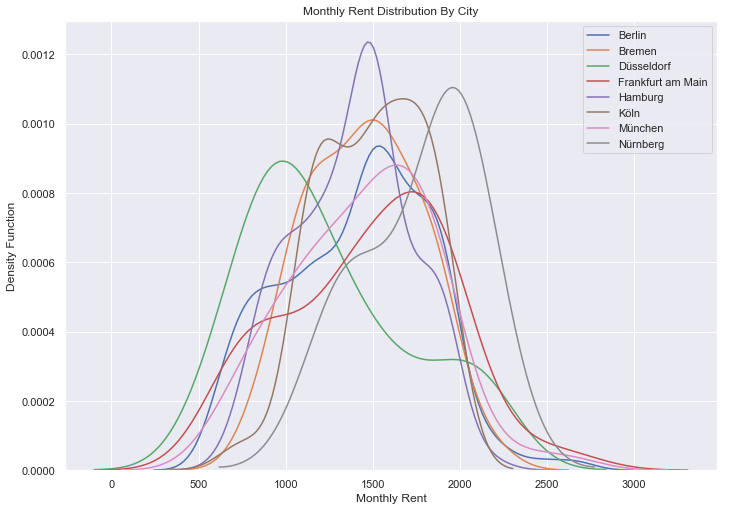

In [91]:
#Density plots of Monthly Rent by City

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(berlin['Monthly Rent'], label="Berlin")
sns.kdeplot(bremen['Monthly Rent'], label="Bremen")
sns.kdeplot(dusseldorf['Monthly Rent'], label="Düsseldorf")
sns.kdeplot(frankfurt['Monthly Rent'], label="Frankfurt am Main")
sns.kdeplot(hamburg['Monthly Rent'], label="Hamburg")
sns.kdeplot(koln['Monthly Rent'], label="Köln")
sns.kdeplot(munich['Monthly Rent'], label="München")
sns.kdeplot(nurnberg['Monthly Rent'], label="Nürnberg")
plt.xlabel('Monthly Rent')
plt.ylabel('Density Function')
plt.title('Monthly Rent Distribution By City')
plt.legend()
plt.show()

**Inferences**

A quick look at the plot tells us that:
    
    - Nürnberg has the highest rents distribution. 
    - Düsseldorf has the lowest rent distribution. 
    - The rent for Hamburg resembles that of the mean rent distribution for all cities combined

### Extracting the statistical rent distribution by city

In [98]:
df_cities = df[['cities', 'Monthly Rent']]

In [100]:
df_cities.groupby('cities').describe().unstack(1)

                     cities           
Monthly Rent  count  Berlin               1167.000000
                     Bremen                 78.000000
                     Düsseldorf             66.000000
                     Frankfurt am Main      70.000000
                     Hamburg               239.000000
                     Köln                   80.000000
                     München               100.000000
                     Nürnberg                6.000000
              mean   Berlin               1413.497243
                     Bremen               1450.812393
                     Düsseldorf           1239.224747
                     Frankfurt am Main    1482.285565
                     Hamburg              1389.951118
                     Köln                 1495.366254
                     München              1454.414667
                     Nürnberg             1770.705556
              std    Berlin                420.705539
                     Bremen                

**Inferences**

- The table above provides information about the maximum, minimum, median, mean, 1st & 3rd quartile rent prices across every city in the dataset.
- We can see most of the leads are in Berlin.
- Wunderflats might have higher sales we focused our attention on cities that have higher rent prices such as Nürnberg & Frankfurt where the 3rd quartile of rent distribution is greater than 1850 Euros. 

## Best Performing Lead Source

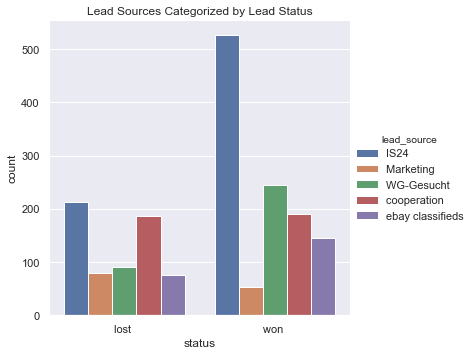

In [107]:
sns.set(rc={'figure.figsize':(12,9)})
sns.catplot(x="status", hue="lead_source", kind="count", data=df)
plt.title('Lead Sources Categorized by Lead Status')
plt.show()

**Inferences** 

- A quick look at this plot tells us that we won more leads when our lead source was WG-Gesucht, IS24 & Ebay Classifields. 
- We lost more leads when our lead source was  Marketing, which is something we should try avoiding going forward. (Pending statistical hypothesis and/or A/B testing with more data).
- An equal number of leads were both won & lost when our lead source was cooperation.

### Identifying the best lead source

In [123]:
#Creating dataframes for won & lost leads

df_won = df[df['status'] == 'won ']
df_lost = df[df['status'] == 'lost ']

In [126]:
df['lead_source'].cat.categories

Index(['IS24', 'Marketing ', 'WG-Gesucht ', 'cooperation ',
       'ebay classifieds'],
      dtype='object')

**Proportion of leads won to lost for the top 3 lead sources**

In [143]:
warnings.filterwarnings('ignore')

print("The proportion of leads won to lost for IS24 is" + " " +
      str(len(df_won[df_won['lead_source'] == 'IS24'])/len(df_lost[df_lost['lead_source'] == 'IS24'])))

print("The proportion of leads won to lost for WG-Gesucht is" + " " +
      str(len(df_won[df_won['lead_source'] == 'WG-Gesucht '])/len(df_lost[df_lost['lead_source'] == 'WG-Gesucht '])))

print("The proportion of leads won to lost for ebay classifieds is" + " " +
      str(len(df_won[df_won['lead_source'] == 'ebay classifieds'])/len(df_lost[df_lost['lead_source'] == 'ebay classifieds'])))

The proportion of leads won to lost for IS24 is 2.4741784037558685
The proportion of leads won to lost for WG-Gesucht is 2.7222222222222223
The proportion of leads won to lost for ebay classifieds is 1.9466666666666668


**Inferences**

- The best performing lead source based on the proportion of won to lost leads is WG-Gesucht with a score of 2.72
- This means that WG-Gesucht wins 2.7 leads for every 1 lead lost.

## Employee Performance Analysis

The objective of this section is to answer 2 questions:
    
    - How could the low performers improve?
    - What performance can we expect in 2019?

### How could the low performers improve?

In order to answer this question, a few questions has to be answered:

- Who are the low performers?
- Why did they perform so low?
- What could they do to improve?

**Who are the low performers?**

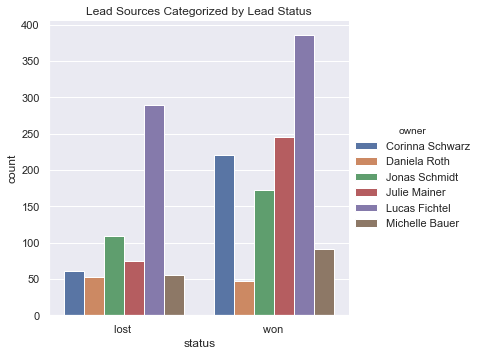

In [138]:
sns.catplot(x="status", hue="owner", kind="count", data=df)
plt.title('Employees Categorized by Lead Status')
plt.show()

**Inferences**

- A quick look at the plot suggests that Daniela Roth is the only employee to lose more leads than she has won them.
- Every other employee has won more leads than lost them. 

In [140]:
df['owner'].cat.categories

Index(['Corinna Schwarz', 'Daniela Roth', 'Jonas Schmidt', 'Julie Mainer',
       'Lucas Fichtel', 'Michelle Bauer'],
      dtype='object')

**Proportion of leads won to lost**

In [145]:
warnings.filterwarnings('ignore')


print("The proportion of leads won to lost for Corinna is" + " " +
      str(len(df_won[df_won['owner'] == 'Corinna Schwarz'])/len(df_lost[df_lost['owner'] == 'Corinna Schwarz'])))

print("The proportion of leads won to lost for Jonas Schmidt is" + " " +
      str(len(df_won[df_won['owner'] == 'Jonas Schmidt'])/len(df_lost[df_lost['owner'] == 'Jonas Schmidt'])))

print("The proportion of leads won to lost for Julie Mainer is" + " " +
      str(len(df_won[df_won['owner'] == 'Julie Mainer'])/len(df_lost[df_lost['owner'] == 'Julie Mainer'])))

print("The proportion of leads won to lost for Michelle Bauer is" + " " +
      str(len(df_won[df_won['owner'] == 'Michelle Bauer'])/len(df_lost[df_lost['owner'] == 'Michelle Bauer'])))

print("The proportion of leads won to lost for Lucas Fichtel is" + " " +
      str(len(df_won[df_won['owner'] == 'Lucas Fichtel'])/len(df_lost[df_lost['owner'] == 'Lucas Fichtel'])))

print("The proportion of leads won to lost for Daniela Roth is" + " " +
      str(len(df_won[df_won['owner'] == 'Daniela Roth'])/len(df_lost[df_lost['owner'] == 'Daniela Roth'])))

The proportion of leads won to lost for Corinna is 3.622950819672131
The proportion of leads won to lost for Jonas Schmidt is 1.5779816513761469
The proportion of leads won to lost for Julie Mainer is 3.2666666666666666
The proportion of leads won to lost for Michelle Bauer is 1.625
The proportion of leads won to lost for Lucas Fichtel is 1.3310344827586207
The proportion of leads won to lost for Daniela Roth is 0.8867924528301887


**Inferences**

The worst performing employees are:

1. Daniela Roth with a Lead Win to Lost Ratio of 0.88
2. Lucas Fichtel with a Lead Win to Lost Ratio of 1.33
3. Jonas Schmidt with a Lead Win to Lost Ratio of 1.57

**Why did they perform badly?**

Some of the ways we could analyze why they performed badly are as follows:

- Understand the number of leads each employee had & compare that with the best performing employee
- Understand the type of lead sources that they used to convert leads into a sale.
- Compare & contrast the number of activities performed by the low performing employees with that of the high performing employees.
- Compare & contrast the type of lead used by the low performing employees with that of the high performing employees.
- Compare & contrast the stage in the pipeline between the low-performing & the high performing employees.
- Compare & contrast the landlord type that was used by the low-performing employees versus the high performing employees.
- Compare & contrast the cities the leads were obtained from for the low-performing vs. the high performing employees.

**Counts of leads by Employee**

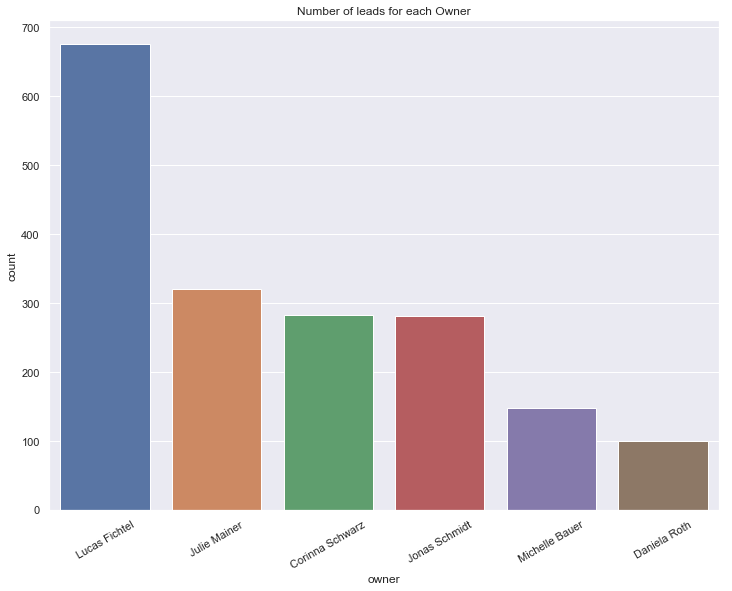

In [161]:
#Bar plot of the lead owners

ax = sns.countplot(df['owner'], order = df['owner'].value_counts().index)
plt.title('Number of leads for each Owner')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

**Inferences**

- One of the possible reasons why Daniela & Michelle performed badly was because she had the **lowest number of leads.** This could be due to several reasons both internal & external which will have to probed into further.
- Lucas on the other had should not have performed as bad as he did, given he had the highest number of leads. We need to understand why he performed badly. 
- Corinna & Julie, who had a **Win to Lost Lead ratio of above 3 had 280-300 leads**.
- Jonas, who also performed badly had the same number of leads as the best performers but still performed badly. 

**Lead sources used by employees**

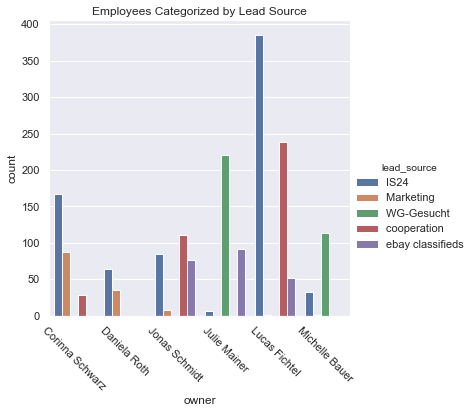

In [163]:
ax = sns.catplot(x="owner", hue="lead_source", kind="count", data=df)
plt.title('Employees Categorized by Lead Source')
ax.set_xticklabels(rotation=-45)
plt.show()

**Inferences**

- Corinna & Julie had leads sources coming in from IS24 & WG-Gesucht which are the top 2 performing lead sources. 
- Lucas's **low performance might be due to the fact that he focused on leads from the cooperation** which was not a good performing lead source.

**Number of activities done by the employees**

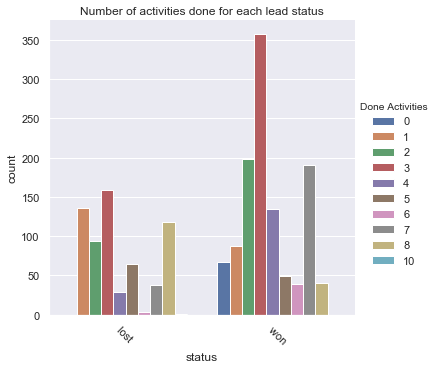

In [165]:
ax = sns.catplot(x="status", hue="Done Activities", kind="count", data=df)
plt.title('Number of activities done for each lead status')
ax.set_xticklabels(rotation=-45)
plt.show()

**Inferences**

- We can see that the sucessfull leads have higher counts of '7 activities done'.
- However there is no clear correlation that tells us that the more/less number of activities done does indeed lead to more deals won as both distributions have 3 as the most number of activities.

**Lead types used by the employees**

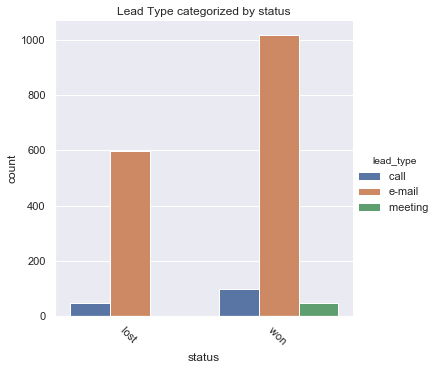

In [169]:
ax = sns.catplot(x="status", hue="lead_type", kind="count", data=df)
plt.title('Lead Type categorized by status')
ax.set_xticklabels(rotation=-45)
plt.show()

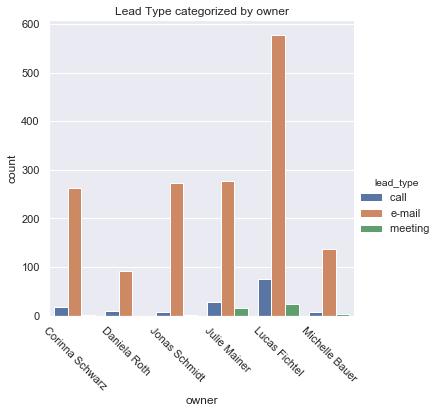

In [171]:
ax = sns.catplot(x="owner", hue="lead_type", kind="count", data=df)
plt.title('Lead Type categorized by owner')
ax.set_xticklabels(rotation=-45)
plt.show()

**Inferences**

- There does not seem to be a clear pattern to tell us if a particular lead type was truly better or not.
- However, if employees focused on using **'meetings' as a lead type they will have a higher chance of winning it.**

**Pipeline & Won Leads**

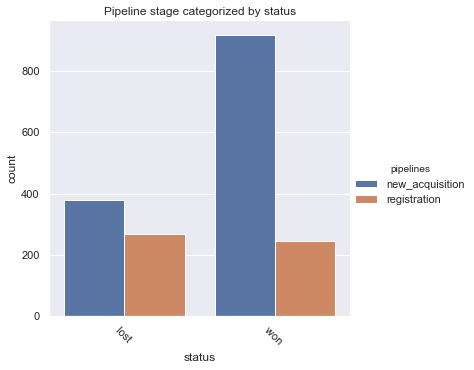

In [173]:
ax = sns.catplot(x="status", hue= "pipelines", kind="count", data=df)
plt.title('Pipeline stage categorized by status')
ax.set_xticklabels(rotation=-45)
plt.show()

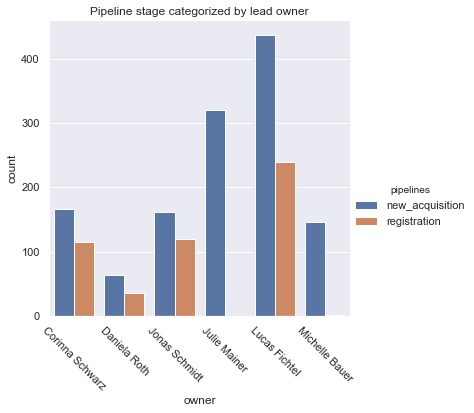

In [175]:
ax = sns.catplot(x="owner", hue= "pipelines", kind="count", data=df)
plt.title('Pipeline stage categorized by lead owner')
ax.set_xticklabels(rotation=-45)
plt.show()

**Inferences**

- There does not seem to be a clear pattern between the pipeline stage & the winning of a lead.

**Landlord type & Employees**

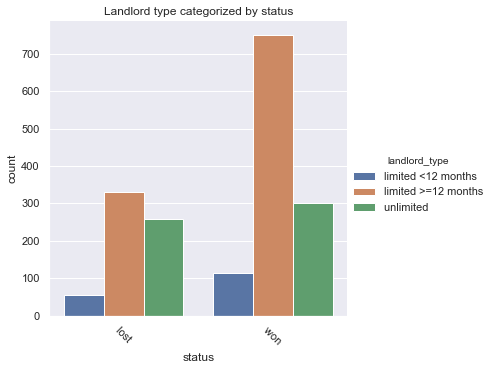

In [176]:
ax = sns.catplot(x="status", hue= "landlord_type", kind="count", data=df)
plt.title('Landlord type categorized by status')
ax.set_xticklabels(rotation=-45)
plt.show()

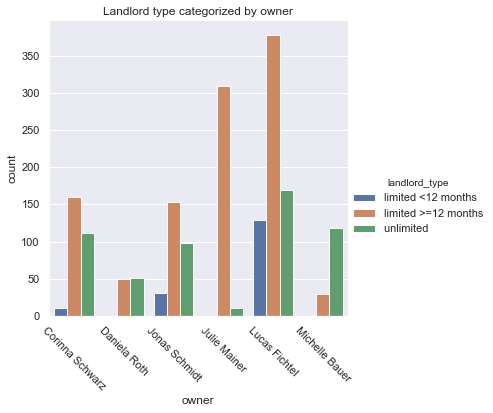

In [177]:
ax = sns.catplot(x="owner", hue= "landlord_type", kind="count", data=df)
plt.title('Landlord type categorized by owner')
ax.set_xticklabels(rotation=-45)
plt.show()

**Inferences**

- From the first plot we can see that a large portion of the **won leads belong to the landlord's who rent their homes for a limited time that is greater than or equal to 12 months.** 
- We can see that the worst performing employees - Daniela Roth & Michelle had very little leads with landlord's of this type. 

**Leads & cities**

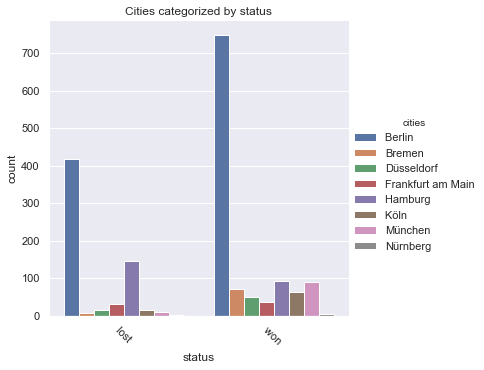

In [178]:
ax = sns.catplot(x="status", hue= "cities", kind="count", data=df)
plt.title('Cities categorized by status')
ax.set_xticklabels(rotation=-45)
plt.show()

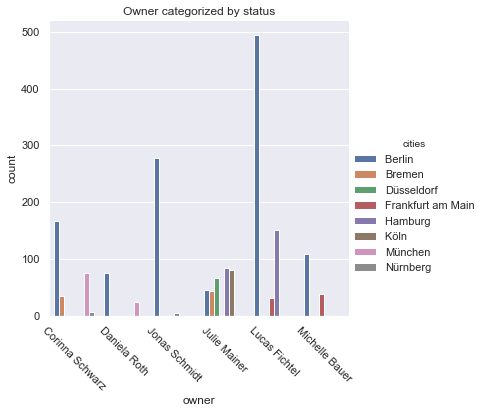

In [179]:
ax = sns.catplot(x="owner", hue= "cities", kind="count", data=df)
plt.title('Owner categorized by status')
ax.set_xticklabels(rotation=-45)
plt.show()

**Inferences**

- We can observe that a **larger proportion of lost leads are from Hamburg.**
- One of the potential reasons why Jonas lost many deals was because he had many leads from Hamburg

### What could the low performing employees do to improve?

Some of the actions the low-performing employees can take are as follows:
    
- Aim to have at least 280-300 leads over a 3.5 year period which is 80-85 leads per year. 
- Focus on lead sources that produce good results such as IS24, WG-Gesucht & Ebay classifieds. 
- Focus on meetings as a key-lead type over Email's & calls. 
- Focus on landlord's who will rent their places for a limited time that is at least 12 months or greater. 
- Focus more on leads outside Hamburg such as Munich, Bremen & Dusseldorf & Koln. 

## What performance can we expect from the employees in 2019?

In order to understand the performance from our employees in the year 2019, we will create an Autoregressive Integrated Moving Average or the (ARIMA) model. 

The key steps invovled are as follows:

- Resampling the data on a monthly basis in order to extract the sum of the leads won by our employees every month.
- Understanding the overall trend & seasonality of the time series data.
- Building & validating the autoregressive model.
- Creating forecasts for 2019 using the model.

### Resampling the data on a monthly basis to extract a time series with leads won every month

In [191]:
df['status'].cat.categories

Index(['lost ', 'won '], dtype='object')

In [198]:
#Converting the lead status column to numerical 

new_category = {1: ['won '], 0: ['lost ']}

In [199]:
new_cat = {v: k for k,vv in new_category.items() for v in vv}

In [200]:
new_cat

{'lost ': 0, 'won ': 1}

In [201]:
df['status_num'] = df['status'].map(new_cat)

In [202]:
df['status_num'].value_counts()

1    1162
0     644
Name: status_num, dtype: int64

In [276]:
#Creating a dataframe with leads won & date & Owner only

df_time = df[['Deal created', 'status_num', 'owner']]

In [278]:
df_date = df_time.set_index('Deal created')

In [282]:
df_date.head()

,status_num,owner,date
Deal created,,,
2015-07-26 20:21:12,1,Lucas Fichtel,2015-07-26 20:21:12
2016-09-27 15:10:18,1,Jonas Schmidt,2016-09-27 15:10:18
2016-09-27 15:11:06,1,Jonas Schmidt,2016-09-27 15:11:06
2016-10-06 10:35:43,1,Jonas Schmidt,2016-10-06 10:35:43
2016-10-06 10:36:44,1,Jonas Schmidt,2016-10-06 10:36:44


In [283]:
#Resampling & finding the sum of the number of leads won on a monthly basis

df_date = df_date.resample('M').sum()

#Backfilling the missing data 

df_date['status_num'] = df_date['status_num'].fillna(method='backfill')

In [285]:
df_date = df_date.reset_index()

In [295]:
df_date = df_date.set_index('Deal created')

In [330]:
#Removing the January 2019 information as the month has not completed yet 
df_date = df_date[:42]

In [332]:
df_date

,status_num
Deal created,
2015-07-31,1.0
2015-08-31,2.0
2015-09-30,2.0
2015-10-31,2.0
2015-11-30,2.0
2015-12-31,2.0
2016-01-31,2.0
2016-02-29,2.0
2016-03-31,2.0


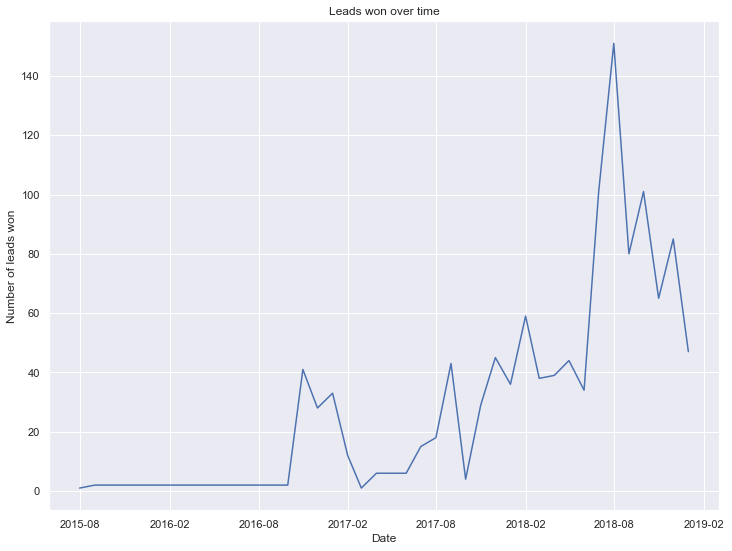

In [333]:
plt.plot(df_date['status_num'])
plt.title('Leads won over time')
plt.ylabel('Number of leads won')
plt.xlabel('Date')
plt.show()

**Inferences**

- We now have a time series data that shows us the total number of leads won every month since 2015.

### Trend, Seasonality & Residuals

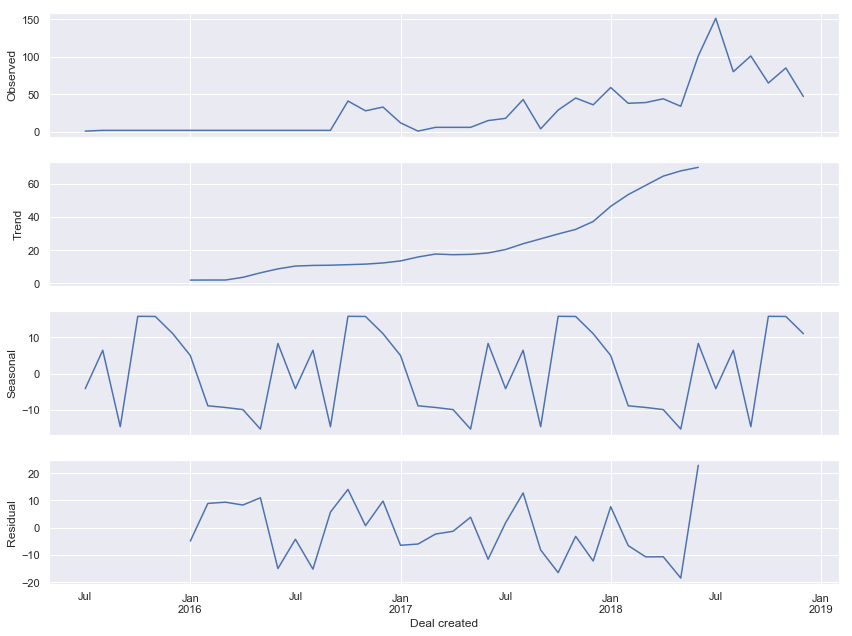

In [334]:
decomposition = sm.tsa.seasonal_decompose(df_date['status_num'], model='additive')
fig = decomposition.plot()
plt.show()

**Inferences**

- The trend clearly goes to show us that the sales will continue to improve over time which is a good thing.
- There is an obvious seasonality in the data. 
- Sales peak during the months of Sept & October.
- Sales decline during the months of August, December, January, Feb, March & April. 
- The residual is the amount of noise in the data - which in this case is not very noisy.
- Data that is not noisy gives us clear signals for forecasting which is good. 

### Building & Validating the autoregressive model

**Choosing the optimal ARIMA model parameters using Grid Search Techniques**

In [335]:
#Building a grid of parameters - p = Seasonality, d = Trend, q = Noise/Residuals

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [336]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [337]:
#Grid search to find optimal sent of params

warnings.filterwarnings('ignore')

for param in pdq:
    
    for param_seasonal in seasonal_pdq:
        
        try:
            
            mod = sm.tsa.statespace.SARIMAX(df_date['status_num'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1284.2104462857665
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:305.7062556234886
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1264.7372603420233
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:194.54528570112726
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:396.8898416224896
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2313.411613602422
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:284.51356873023104
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:303.99757438085965
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1311.4201795593517
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:193.01764031751358
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1049.8650947774495
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:278.26628815041016
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1146.7408151389025
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:176.18540698002826
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:356.4632108159323
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:971.0003588991837
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:263.178463753072
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:276.68670147456834

- The output above suggests that **ARIMA(1, 1, 1)x(1, 1, 0, 12)12** is the best parameter for the ARIMA model as it produces an **AIC:177.69089868629084** which is the lowest amoung all other parameter combinations.


In [338]:
#Building the model on our data

mod = sm.tsa.statespace.SARIMAX(df_date['status_num'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [339]:
results = mod.fit()

In [340]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5190      0.757     -0.685      0.493      -2.003       0.966
ma.L1          0.0334      0.818      0.041      0.967      -1.570       1.637
ar.S.L12      -0.5285      0.985     -0.537      0.592      -2.459       1.402
sigma2      1180.4911    472.078      2.501      0.012     255.235    2105.748


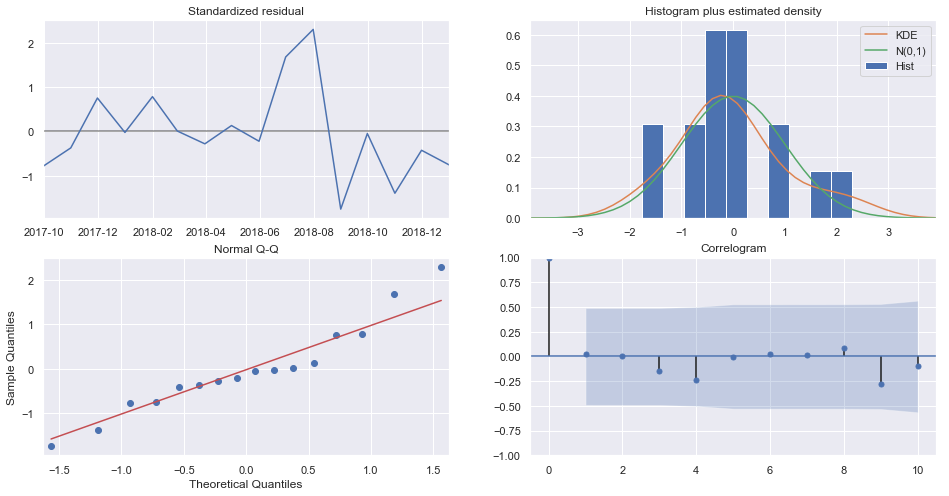

In [341]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Quickly looking at the diagnostics of the model we can infer that:
    
- We don't have a perfect model with 0 residual/error but    
- The model's residuals are normally distributed which is good.

**Validating the model's results**

We will now observe how the forecasted model performs with time series data that already exists from 2017 in order to understand if the forecasted model is as close to the observed time series or not.

In [342]:
y = df_date['status_num']

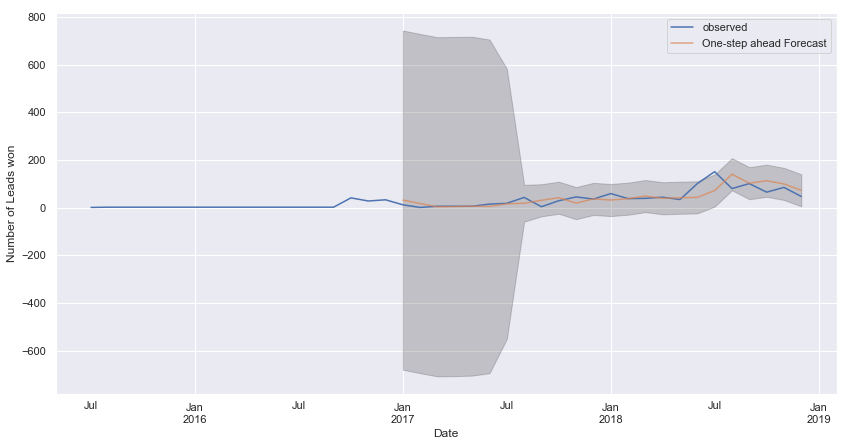

In [343]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Leads won')
plt.legend()
plt.show()

Comparing the forecasted time series (Orange) Vs. the Observed time series (Blue):
    
- The forecasted time series fits the trend of the observed time series closely. 
- This suggests that the forecasted model is indeed good & will perform well in forecasting employee performance in 2019. 

**Quantifying the results of the forecasted model**

In [344]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 843.3


In [345]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 29.04


- The mean squared error is a measure of the quality of the estimator. The smaller it's value the better the estimator. A value of 843 is small which suggests the model is good.
- The Root Mean Squared Error tells us the model was abel to forecast the total number of leads won every month within 29 leads of the actual/observed leads. 
- Since our total monhtly leads go from 1 to 151, this is good. 

### Creating Forecasts for 2019

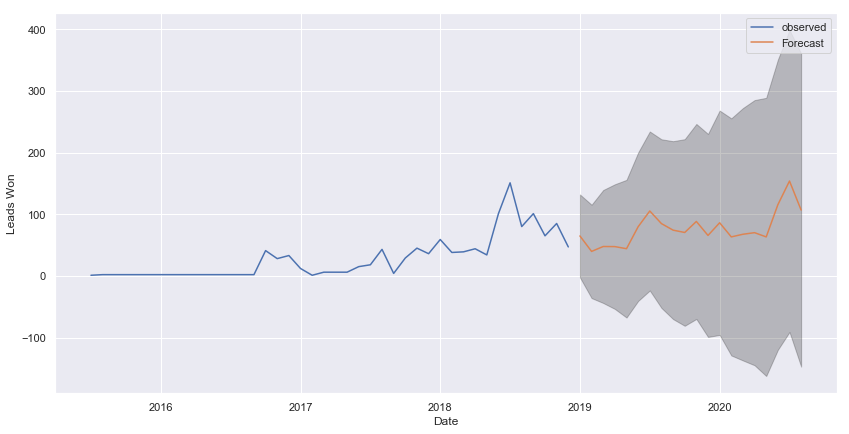

In [346]:
pred_uc = results.get_forecast(steps= 20)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Leads Won')
plt.legend()
plt.show()

**Inferences**

A quick look at the forecasts suggests that:
    
- The employees will perform consistently well in 2019.
- However, we also see that the performance will not be nearly as good as it was in 2018. 
- Taking actionable steps in order to improve the employee performance & focusing on the lead sources will help us achieve higher sales. 

## Conclusions

- **Best Performing Lead Source**
    
    - The best performing lead source was identified to be **WG-Gesucht**.
    

- **Comparing Employee Performance**

    **Low Performers can improve if**

    - Aim to have at least 280-300 leads over a 3.5 year period which is 80-85 leads per year. 
    - Focus on lead sources that produce good results such as IS24, WG-Gesucht & Ebay classifieds. 
    - Focus on meetings as a key-lead type over Email's & calls. 
    - Focus on landlord's who will rent their places for a limited time that is at least 12 months or greater. 
    - Focus more on leads outside Hamburg such as Munich, Bremen & Dusseldorf & Koln. 
    
   **Expected Performance in 2019**
    
    - Consistenty good performance with lower peaks in sales compared to 2018. 
 
- **Apartment Rent Distribution per City**

    - Visualized with a series of overlapping density plot for every city.
    - Statistical table with - min, max, 25, 50, 75 & mean provided for each city. 